In [119]:
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import StandardScaler
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import numpy as n
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import plotly.plotly as py
#import plotly.tools as tls
import seaborn as sns
import random 

from math import sqrt  

import calendar
import datetime 

In [120]:
!sudo pip install --upgrade pip
!sudo pip install xlrd

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
/usr/local/lib/python2.7/dist-packages/pip/_vendor/urllib3/util/ssl_.py:380: SNIMissingWarning: An HTTPS request has been made, but the SNI (Server Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  SNIMissingWarning,
/usr/local/lib/python2.7/dist-packages/pip/_vendor/urllib3/util/ssl_.py:139: InsecurePlatformWarning: A true SSLContext object is not available. This

In [121]:
%matplotlib inline   

In [122]:
Waves1 = pd.read_csv('Buoys-Waves.csv')
Control = pd.read_csv('control.csv')


In [123]:
Waves1 = Waves1.rename(columns = {'Date/Time' : 'time','Hs' : 'significant_wave_height' , 'Hmax' : 'maximum_wave_height', 'Tz' : 'zero_wave_period',
                       'Tp' : 'peak_wave_period' , 'SST' : 'sea_surface_temperature' , 'Peak Direction' : 'peak_direction'})
Waves1 = Waves1[Waves1['maximum_wave_height'] != -99.9]
Waves1.head() 

,time,significant_wave_height,maximum_wave_height,zero_wave_period,peak_wave_period,peak_direction,sea_surface_temperature
1,1/1/2017 0:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,1/1/2017 1:00,0.763,1.15,4.520,5.513,49.0,25.65
3,1/1/2017 1:30,0.770,1.41,4.582,5.647,75.0,25.50
4,1/1/2017 2:00,0.747,1.16,4.515,5.083,91.0,25.45
5,1/1/2017 2:30,0.718,1.61,4.614,6.181,68.0,25.45


# Background/Introduction

I am exploring the years of 2017-2019. My goal is to find interactions between data columns, if any exist (ex. Peak wave height and average wave height).Using the location and direction of the wave currents, being able to plot the patterns of the waves. Plot the patterns of ocean currents throughout a calendar year. Predict information about future wave patterns given a set of parameters such as time of year or ocean temperature. People who may be interested in this data would be surfers as well as people who may study wave patterns. 

# Data

I plan to compare years as well as months with my main columns such as significant wave height and sea sruface temperature ,to see any patterns that may be useful. I would like to study the waves specifically by month as I believe the colder months of the year such as november - march would have either a higher wave impact from the weather or even a lower impact from the weather.

In [124]:
#This code allows me to break up the time column because it was not useful to me, and make 
#individual columns such as month,year and time
Waves1["time"] = pd.to_datetime(Waves1["time"])
Waves1["year"] = Waves1["time"].astype(str).str[0:4]
Waves1["year"] = Waves1["year"].astype(int)

Waves1["time1"] = Waves1["time"].astype(str).str[11:16]
Waves1["month"] = Waves1["time"].astype(str).str[5:7]
Waves1.head()

,time,significant_wave_height,maximum_wave_height,zero_wave_period,peak_wave_period,peak_direction,sea_surface_temperature,year,time1,month
1,2017-01-01 00:30:00,0.875,1.39,4.421,4.506,-99.9,-99.90,2017,00:30,01
2,2017-01-01 01:00:00,0.763,1.15,4.520,5.513,49.0,25.65,2017,01:00,01
3,2017-01-01 01:30:00,0.770,1.41,4.582,5.647,75.0,25.50,2017,01:30,01
4,2017-01-01 02:00:00,0.747,1.16,4.515,5.083,91.0,25.45,2017,02:00,01
5,2017-01-01 02:30:00,0.718,1.61,4.614,6.181,68.0,25.45,2017,02:30,01


In [125]:
# Variable meanings in the wave datset
# Date/Time - Date
#Hs -Significant wave height, an average of the highest third of the waves in a record
#Hmax -The maximum wave height in the record
#Tz- The zero upcrossing wave period
#Tp- The peak energy wave period
#Peak Direction -Direction (related to true north) from which the peak period waves are coming from
#SST -Approximation of sea surface temperature
print (len(Control))
print (len(Waves1)) 

511
43643


# Problem Statement and Background

Problem Statement and Background

Using data collected by buoys on oceanic wave patterns 
over a 30-month period, we will be looking at data dealing with wave height, 
energy, frequency, temperature, etc. during half hour intervals and attempting 
to find interactions between these columns, as well as plotting and predicting the wave 
pattern in the future given certain parameters base on the collected data. These are our
main goals going into the research. To find interactions between data columns, if any exist 
(ex. Peak wave height and average wave height).Using the location and direction of the wave 
currents, being able to plot the patterns of the waves. Plot the patterns of ocean currents
throughout a calendar year. Predict information about future wave patterns given a set of
parameters such as time of year or ocean temperature. After analyzing what time and temperatures
occur with the waves, it would be in our best interest if we could also investigate if they are
related to the time and temperature that sharks often would attack. If there, is a relationship
between shark attacks to wave occurrence we can see when it is safe to surf as well  as should 
surfing not even be an option during certain times of the day / seasons. We know that shark attacks 
are not predictable so far because almost all beaches have shark nets for protection. 
So almost all shark attacks are random. We plan to use our data to see if these attacks 
are more than random occurrences.

# Data Sources

The Data Source(s) You Intend to Use 

https://www.kaggle.com/jolasa/waves-measuring-buoys-data-mooloolaba
https://www.data.qld.gov.au/dataset/coastal-data-system-waves-mooloolaba

We found two datasets from kaggle that would be very beneficial for our project. The first 
dataset has 24000 rows and 6 columns. While the second dataset has 511 rows and 11 columns .
I plan to collect more data as the project goes on because the more the better. For now, I have
enough data to be satisfied for a quality project. I plan to join both datasets into one 
but it will take some time to figure out. The first dataset is stored in the Waves data frame
in codio in the file (WavesCode)   and the second dataset is stored in the “Control” data 
frame in the file (WavesCode). There is many data to work with so it should come out very 
clean and consistent.     

# Data Flaws/Weaknesses and Cleaning

Data Flaws/Weaknesses and Cleaning

I was able to successfully join the two datasets. Any errors I did have in my data I either manually fixed or wrote a function 
that would clean it. 
 

In [126]:
#cleaning up the data
#Waves = Waves.rename(columns = {'Hs' : 'significant_wave_height' , 'Hmax' : 'maximum_wave_height', 'Tz' : 'zero_wave_period',
#'Tp' : 'peak_wave_period' , 'SST' : 'sea_surface_temperature' , 'Peak Direction' : 'peak_direction'})


# Basic Data Characteristics

# Methodology

Basic Data Characteristics
In my codio file I was able to look more into these types of graphs and display them better.

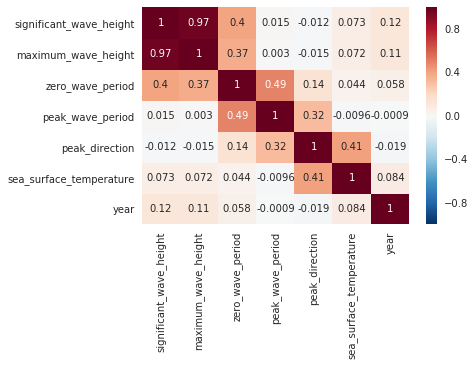

In [127]:
sns.heatmap(Waves1.corr(), annot=True)  

AxesSubplot(0.125,0.125;0.775x0.755)


month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2017,1.112207,1.261344,1.401723,1.600152,1.330598,1.242637,0.836827,0.866170,0.863067,1.282286,1.335801,0.991928
2018,1.164329,1.562520,1.721793,1.513944,1.176944,1.190878,0.875884,0.843514,1.116912,1.346995,1.047188,1.426663
2019,1.133123,1.973305,1.105316,1.593860,1.240443,1.256230,1.505330,1.400917,1.109806,1.079667,1.151177,1.231104


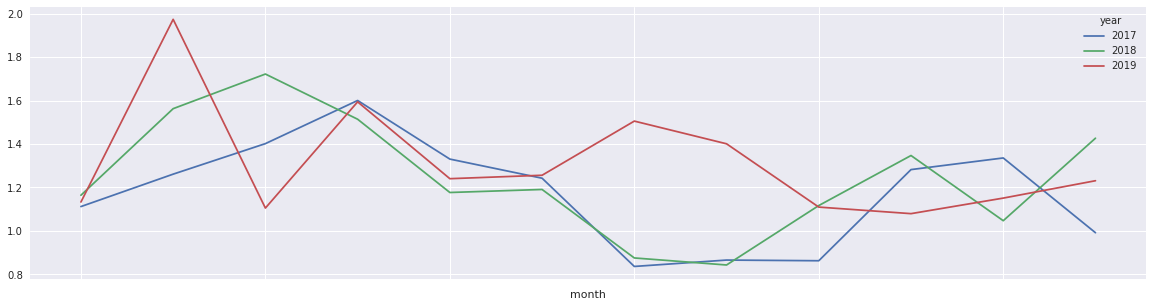

In [128]:
#Shows the average wave height from 2017-2019 throughout all 12 months of the year.
print(Waves1.pivot_table('significant_wave_height', index="month",columns = 'year').plot(figsize=(20,5)))
Waves1[Waves1.significant_wave_height >0].pivot_table('significant_wave_height', index='year',columns = "month")


AxesSubplot(0.125,0.125;0.775x0.755)


month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2017,26.194448,27.177527,26.961186,24.399408,23.186741,22.286822,21.326078,21.379568,21.470537,22.859535,23.966900,25.586186
2018,26.742881,26.589829,26.265172,25.342708,23.418203,21.630694,20.764166,20.389912,20.994019,22.426236,23.690985,24.635892
2019,26.382846,26.273535,26.175881,24.770826,23.478292,22.462162,24.888368,24.911285,24.998958,25.065972,24.986111,25.032986


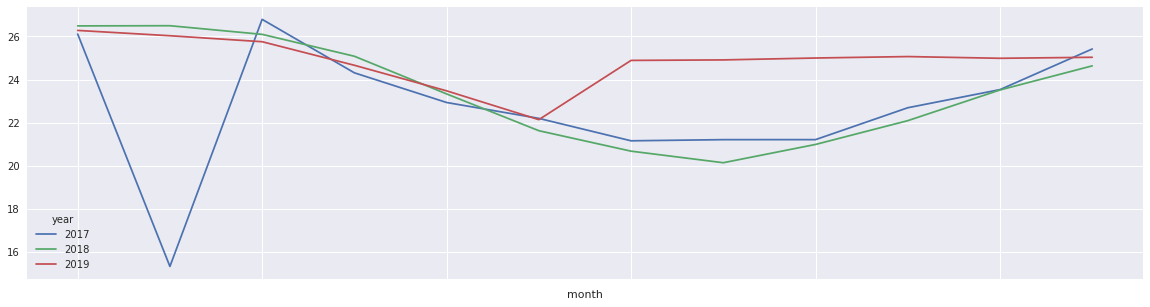

In [129]:
#Shows the average sea temperature by year from 2017-2019 throughout all 12 months of the year. 
print(Waves1.pivot_table('sea_surface_temperature', index="month",columns = 'year').plot(figsize=(20,5)))
Waves1[Waves1.sea_surface_temperature >0].pivot_table('sea_surface_temperature', index='year',columns = "month") 

/usr/local/lib/python3.4/dist-packages/matplotlib-2.1.1+1236.g869c984f5-py3.4-linux-x86_64.egg/matplotlib/axes/_axes.py:6408: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


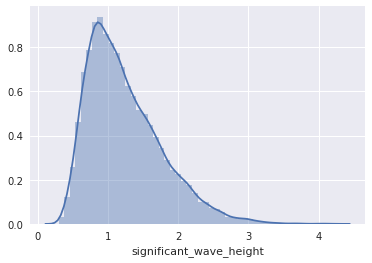

In [130]:
sns.distplot( Waves1["significant_wave_height"] )

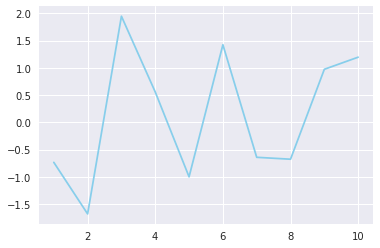

In [131]:
Waves1=pd.DataFrame({'sea_surface_temperature': range(1,11), 'maximum_wave_height': np.random.randn(10) })
plt.plot( 'sea_surface_temperature', 'maximum_wave_height', data=Waves1, color='skyblue')
plt.show()
#Displays a relationship of the max wave height in comparison to the approximate sea surface temperature.

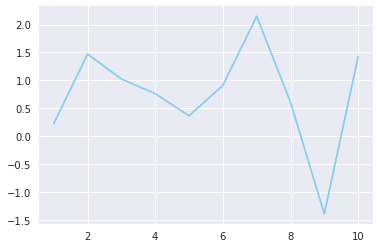

None


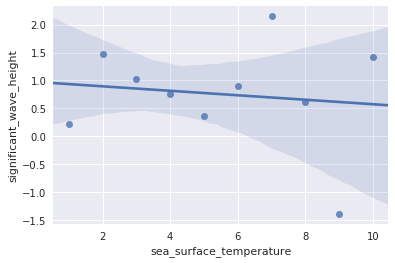

In [132]:
Waves1=pd.DataFrame({'sea_surface_temperature': range(1,11), 'significant_wave_height': np.random.randn(10) })
plt.plot( 'sea_surface_temperature', 'significant_wave_height', data=Waves1, color='skyblue')
print(plt.show())

sns.regplot(x=Waves1["sea_surface_temperature"], y=Waves1["significant_wave_height"])
#Displays a relationship of the significant wave height in comparison to the approximate sea surface temperature.

In [133]:
#print(sns.regplot(x=Waves1["maximum_wave_height"], y=Waves1["sea_surface_temperature"],fit_reg=False))

In [134]:
#print(sns.regplot(x=Waves1["maximum_wave_height"], y=Waves1["peak_direction"],fit_reg=True))

# Surprises

Surprises
I did not have any surprises so far in my data. The majority of shark attacks occur near the 
shore and in the surf zone because their natural preys live in these areas. But attacks also 
take place in steep underwater drop-offs, where divers often swim. The wave height should not 
be a surprise where the attacks will take place. 

# Next Steps, any Obstacles


My next step would be to join the two datasets, which may take some time. Once I do this, it 
should be much easier to work with. I also plan to use another kaggle file that I was not able to
download due to the size of the file. It is not much of an obstacle but it does briefly delay our 
coding. The file contained moon phases, which we could study and possibly link to our wave data. 
With this information, we could look at if there was a three-way relationship between waves, sharks
attacks, and moon phases.     

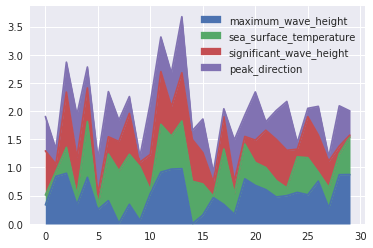

In [135]:
Waves1 = pd.DataFrame(np.random.rand(30, 4), columns=['maximum_wave_height', 'sea_surface_temperature', 'significant_wave_height',
'peak_direction'])
 
# plot
Waves1.plot.area()
# The height of each coloured stack represents the percentage proportion of that category at a given point in time. For this 
# I wanted to see the the categories of the maximum height, sea surface temperature, significant wave height, and the peak 
#direction of where the waves are coming from.  

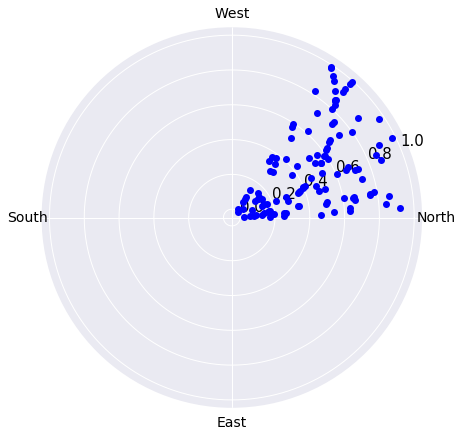

In [136]:
from math import pi
y1 = Waves1[Waves1.peak_direction > 0].values
x1 = Waves1[Waves1.peak_direction > 0].sea_surface_temperature
categories = ["North","West","South","East"]
N = len(categories)
plt.rcParams['figure.figsize'] = (7, 7)
plt.axes(projection='polar')
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
plt.xticks(angles[:-1], categories, color='black', size=14)
plt.yticks(color="black", size=15)
plt.polar(x1, y1,  'ro', color= "blue")
plt.show() 

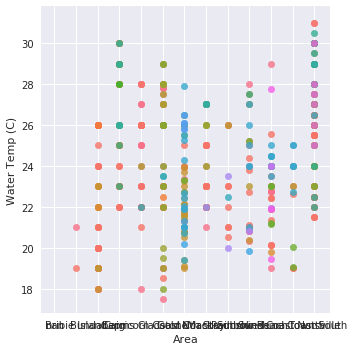

In [137]:
sns.lmplot( x="Area", y="Water Temp (C)", data=Control, fit_reg=False, hue='Species Name', legend=False)
# Shows the area and water temperature with what species of shark attacked. 
# Will adjust X and Y axis later once I figure out how to.  

In [138]:
Control.head()

,Species Name,Species Code,Date,Area,Location,Latitude,Longitude,Fate,Length (m),Water Temp (C),Number Caught
0,BULL WHALER,37018021.0,8/4/2017,Bribie Island,Woorim (Bribie Island),-27.06835189,153.2113376,Dead,1.55,21.0,1
1,TIGER SHARK,37018022.0,8/8/2017,Bribie Island,Woorim (Bribie Island),27.06511,153.2108,Euthanised,3.55,19.0,1
2,BULL WHALER,37018021.0,3/3/2017,Bundaberg,Neilson Park,-24.80429012,152.4641092,Dead,1.56,26.0,1
3,BULL WHALER,37018021.0,3/3/2017,Bundaberg,Kellys Beach,-24.83788865,152.4673179,Dead,1.79,26.0,1
4,BULL WHALER,37018021.0,17/03/2017,Bundaberg,Neilson Park,-24.80864323,152.4327342,Dead,1.56,26.0,1


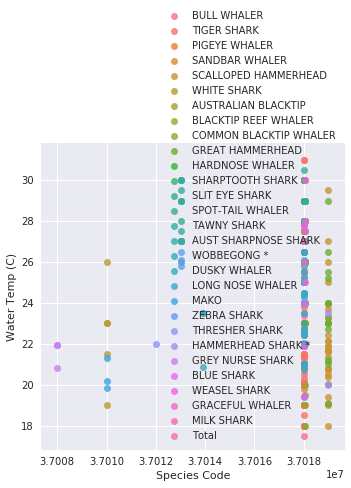

In [139]:
sns.lmplot( x="Species Code", y="Water Temp (C)", data=Control, fit_reg=False, hue='Species Name', legend=False)

plt.legend(loc='lower right')
 